In [2]:
%load_ext autoreload
%autoreload 2

In [143]:

import pandas as pd
import numpy as np
import re
from clean import *

In [144]:
!ls ./data > data.txt

In [149]:
with open('data.txt','r') as f:
    lines = f.readlines()

data = []   
for line in lines:
    data.append(pd.read_csv('./data/'+line[:-1]))

df = pd.concat(data)

In [150]:
df = clean(df)

In [151]:
df.columns = ['Address','Amenities','BuildingSize','City','ListingDate',\
              'Rate','AvailableSpace','NumSpaces','State','SubType',\
              'Transport','Utilities']


In [98]:
colFun = {'City' : ['count'],
          'Rate' : ['min','max','mean','std'],
          'AvailableSpace' : ['min','max','mean','std'],
          'NumSpaces' : ['min','max','mean','std'],
          'SubType' : ['count']
         }

In [110]:
df.groupby(['State','City']).agg(colFun).loc[['TN']]

City  Rate                           AvailableSpace  \
                     count   min   max      mean       std            min   
State City                                                                  
TN    Andersonville      2  0.32  0.41  0.365000  0.063640         115300   
      Antioch            2  0.64  0.71  0.675000  0.049497          15000   
      Brownsville        1  0.22  0.22  0.220000       NaN          76932   
      Calhoun            1  0.33  0.33  0.330000       NaN          19500   
      Chattanooga       14  0.21  0.65  0.400357  0.132062           4625   
      Clarksville        3  0.50  1.08  0.743333  0.301054           7460   
      Cleveland          2  0.17  0.42  0.295000  0.176777          44000   
      Collierville       1  0.58  0.58  0.580000       NaN          11200   
      Columbia           2  1.00  1.04  1.020000  0.028284           2500   
      Cookeville         1  0.54  0.54  0.540000       NaN          20000   
      Cordova            1  0.71  0.71  0.710000       NaN          20000   
      Crossville         1  0.82  0.82  0.820000       NaN           3680   
      Decherd            1  0.18  0.18  0.180000       NaN          20000   
      Dickson            2  0.29  0.33  0.310000  0.028284          18000   
      Elizabethton       1  0.27  0.27  0.270000       NaN          76800   
      Fayetteville       1  0.23  0.23  0.230000       NaN         695000   
      Franklin           1  1.25  1.25  1.250000       NaN          26500   
      Gallaway           1  0.25  0.25  0.250000       NaN          32200   
      Goodlettsville     1  0.41  0.41  0.410000       NaN         207030   
      Gray               1  0.46  0.46  0.460000       NaN          37460   
      Greeneville        1  0.15  0.15  0.150000       NaN          35000   
      Hendersonville     1  0.75  0.75  0.750000       NaN          12613   
      Jackson            3  0.13  0.67  0.376667  0.273008           3000   
      Jefferson City     1  0.46  0.46  0.460000       NaN           4752   
      Johnson City       2  0.21  0.90  0.555000  0.487904           2458   
      Kingsport          5  0.29  0.86  0.512000  0.223092           3500   
      Knoxville          8  0.35  0.70  0.532500  0.117443           5000   
      La Vergne          7  0.46  1.00  0.795714  0.183108           2600   
      Lebanon            2  0.44  1.50  0.970000  0.749533          10000   
      Louisville         1  0.69  0.69  0.690000       NaN           6732   
      Madison            5  0.83  0.83  0.830000  0.000000           1000   
      Martin             1  0.52  0.52  0.520000       NaN           4800   
      Maryville          1  0.42  0.42  0.420000       NaN          43000   
      Memphis           22  0.08  1.00  0.384773  0.243870           3750   
      Milan              1  0.30  0.30  0.300000       NaN         253114   
      Morristown         1  0.25  0.25  0.250000       NaN          17000   
      Mount Juliet       1  0.77  0.77  0.770000       NaN           6000   
      Murfreesboro       1  0.71  0.71  0.710000       NaN          19680   
      Nashville         22  0.38  2.08  0.904545  0.376041           3000   
      Newbern            1  0.25  0.25  0.250000       NaN         252000   
      Nolensville        1  1.21  1.21  1.210000       NaN           5000   
      Oak Ridge          2  0.41  0.65  0.530000  0.169706           6400   
      Portland           3  0.30  0.39  0.353333  0.047258          59518   
      Sevierville        1  0.38  0.38  0.380000       NaN           7000   
      Smithville         1  0.35  0.35  0.350000       NaN         245346   
      South Fulton       1  0.20  0.20  0.200000       NaN          25400   
      Sparta             1  0.25  0.25  0.250000       NaN          32000   

                                                            NumSpaces      \
                          max           mean            std       min max   
State City       

In [116]:
df.head()

,Address,Amenities,BuildingSize,City,ListingDate,Rate,AvailableSpace,NumSpaces,State,SubType,Transport,Utilities
0,2350 Twelfth Ave,"[Bus Line, Cooler]",17584,New York,2018-11-08,2.25,17584,3,NY,Industrial,{'Harlem-125th Street Station Commuter Rail (H...,"[Lighting - Fluorescent, Gas - Natural, Water ..."
1,348 Old Niskayuna Rd,[Fenced Lot],63752,Albany,2018-11-08,0.65,27105,1,NY,Industrial,{},"[Gas, Water, Heating - Gas]"
2,58-38 59th St,"[24 Hour Access, Bus Line, Property Manager on...",13692,Maspeth,2019-08-01,1.67,5000,1,NY,Industrial,{'Woodside Station Commuter Rail (Ronkonkoma B...,"[Lighting - Fluorescent, Gas - Natural, Water ..."
3,22 Sawgrass Dr,"[Property Manager on Site, Air Conditioning]",11900,Bellport,2020-02-27,1.16,2150,1,NY,Office,{'Bellport Station Commuter Rail (Montauk Bran...,None
4,7940 Cooper Ave,None,15000,Flushing,2019-10-01,4.00,5000,1,NY,Industrial,{'Forest Hills Station Commuter Rail (Long Bea...,None


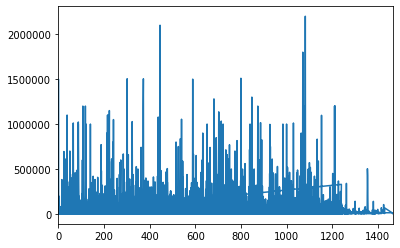

In [120]:
df.AvailableSpace.plot()

In [127]:
from collections import defaultdict


In [128]:
d = defaultdict()

In [139]:
is_empty(d)

NameError: name 'is_empty' is not defined

In [142]:
if d:
    print('Yes')
else:
    print('NO')

NO
